In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import nltk

np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=6)

import csv

import scipy
from scipy import stats
from scipy.stats import pearsonr

from numpy import genfromtxt

from sklearn.linear_model import LinearRegression


def cos_sim(v1, v2):
	return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


In [10]:

#metusalem2012_experiment-glove_6B_50d_twitter
#metusalem2012_experiment-en_core_web_lg
#data = genfromtxt('metusalem2012_glove_6B_100d_reservoir.csv', delimiter=',')
data_wiki = genfromtxt('../embeddingsExperiments/metusalem2012_experiment-glove-wiki100.csv', delimiter=',')
data_twit = genfromtxt('../embeddingsExperiments/metusalem2012_experiment-glove_6B_50d_twitter.csv', delimiter=',')
data_lg = genfromtxt('../embeddingsExperiments/metusalem2012_experiment-en_core_web_lg.csv', delimiter=',')
data_w2v = genfromtxt('../embeddingsExperiments/metusalem2012_experiment.csv', delimiter=',')
data_w2v5 = genfromtxt('../embeddingsExperiments/metusalem2012_experiment - wi2v-500-taka.csv', delimiter=',')
data_twit200 = genfromtxt('../embeddingsExperiments/metusalem2012_experiment-glove_6B_50d_twitter200.csv', delimiter=',')
data_japan = genfromtxt('../embeddingsExperiments/metusalem2012_experiment_japanese_20200710.csv', delimiter=',')
data_japan300 = genfromtxt('../embeddingsExperiments/takahisa-w2v300/metusalem2012_experiment_japanese_300d.csv', delimiter=',')
data_google300 = genfromtxt('../embeddingsExperiments/metusalem2012_experiment-google300d.csv', delimiter=',')


#metusalem2012_experiment-google300d
#metusalem2012_experiment - wi2v-500-taka
#metusalem2012_experiment-glove_6B_50d_twitter200

In [11]:
# Metusalem Inference

# this is the main statistic, looking at the impact of discourse on UR vs UU
print('twit: for BC vs EF',stats.ttest_rel(data_twit[:,1] - data_twit[:,2] , data_twit[:,4] - data_twit[:,5] ))
print('twit200: for BC vs EF',stats.ttest_rel(data_twit200[:,1] - data_twit200[:,2] , data_twit200[:,4] - data_twit200[:,5] ))
print('glove100: for BC vs EF',stats.ttest_rel(data_wiki[:,1] - data_wiki[:,2] , data_wiki[:,4] - data_wiki[:,5] ))
print('spacey-lg-300: for BC vs EF',stats.ttest_rel(data_lg[:,1] - data_lg[:,2] , data_lg[:,4] - data_lg[:,5] ))
print('w2v100: for BC vs EF',stats.ttest_rel(data_w2v[:,1] - data_w2v[:,2] , data_w2v[:,4] - data_w2v[:,5] ))
#data=data_w2v5
#print('w2v500: for BC vs EF',stats.ttest_rel(data[:,1] - data[:,2] , data[:,4] - data[:,5] ))

print('google300: for BC vs EF',stats.ttest_rel(data_google300[:,1] - data_google300[:,2] , data_google300[:,4] - data_google300[:,5] ))

#data=data_japan
#print('japan-wi2v: for BC vs EF',stats.ttest_rel(data[:,1] - data[:,2] , data[:,4] - data[:,5] ))
#data=data_japan300
#print('japan-wi2v300: for BC vs EF',stats.ttest_rel(data[:,1] - data[:,2] , data[:,4] - data[:,5] ))

#MetusalemInference = [stats.ttest_rel(data_twit[:,1] - data_twit[:,2] , data_twit[:,4] - data_twit[:,5] )[0], stats.ttest_rel(data_twit200[:,1] - data_twit200[:,2] , data_twit200[:,4] - data_twit200[:,5] )[0], stats.ttest_rel(data_wiki[:,1] - data_wiki[:,2] , data_wiki[:,4] - data_wiki[:,5] )[0], stats.ttest_rel(data_lg[:,1] - data_lg[:,2] , data_lg[:,4] - data_lg[:,5] )[0], stats.ttest_rel(data_w2v[:,1] - data_w2v[:,2] , data_w2v[:,4] - data_w2v[:,5] )[0], stats.ttest_rel(data_google300[:,1] - data_google300[:,2] , data_google300[:,4] - data_google300[:,5] )[0]]
MetusalemInference = [abs(stats.ttest_rel(data_twit[:,1] - data_twit[:,2] , data_twit[:,4] - data_twit[:,5] )[0]), abs(stats.ttest_rel(data_twit200[:,1] - data_twit200[:,2] , data_twit200[:,4] - data_twit200[:,5] )[0]), abs(stats.ttest_rel(data_wiki[:,1] - data_wiki[:,2] , data_wiki[:,4] - data_wiki[:,5] )[0]), abs(stats.ttest_rel(data_lg[:,1] - data_lg[:,2] , data_lg[:,4] - data_lg[:,5] )[0]), abs(stats.ttest_rel(data_w2v[:,1] - data_w2v[:,2] , data_w2v[:,4] - data_w2v[:,5] )[0]), abs(stats.ttest_rel(data_google300[:,1] - data_google300[:,2] , data_google300[:,4] - data_google300[:,5] )[0])]

print(MetusalemInference)
print(len(MetusalemInference))

twit: for BC vs EF Ttest_relResult(statistic=-1.2090810262012297, pvalue=0.23064269122552664)
twit200: for BC vs EF Ttest_relResult(statistic=-3.028756992848879, pvalue=0.0034223686751479005)
glove100: for BC vs EF Ttest_relResult(statistic=-3.0421425850337798, pvalue=0.0032907330885527564)
spacey-lg-300: for BC vs EF Ttest_relResult(statistic=-5.084216973160783, pvalue=2.8826664161977603e-06)
w2v100: for BC vs EF Ttest_relResult(statistic=-4.143100747687799, pvalue=9.328642450789364e-05)
google300: for BC vs EF Ttest_relResult(statistic=-5.86822335386013, pvalue=1.287675830111274e-07)
[1.2090810262012297, 3.028756992848879, 3.0421425850337798, 5.084216973160783, 4.143100747687799, 5.86822335386013]
6


In [12]:
# Metusalem Semantics


# NOW compare to a simpler mesure of semantics
print('twit: for BC vs EF',stats.ttest_rel(data_twit[:,0]  , (data_twit[:,1] + data_twit[:,2])/2 ))
print('twit200: for BC vs EF',stats.ttest_rel(data_twit200[:,0]  , (data_twit200[:,1] + data_twit200[:,2])/2 ))

print('glove100: for BC vs EF',stats.ttest_rel(data_wiki[:,0]  , (data_wiki[:,1] + data_wiki[:,2])/2 ))
print('spacey-lg-300: for BC vs EF',stats.ttest_rel(data_lg[:,0]  , (data_lg[:,1] + data_lg[:,2])/2 ))

print('w2v100: for BC vs EF',stats.ttest_rel(data_w2v[:,0]  , (data_w2v[:,1] + data_w2v[:,2])/2 ))
#data=data_w2v5
#print('w2v500: for BC vs EF',stats.ttest_rel(data[:,0]  , (data[:,1] + data[:,2])/2 ))

print('google300: for BC vs EF',stats.ttest_rel(data_google300[:,0]  , (data_google300[:,1] + data_google300[:,2])/2 ))

#data=data_japan
#print('japan-wi2v: for BC vs EF',stats.ttest_rel(data[:,0]  , (data[:,1] + data[:,2])/2 ))
#data=data_japan300
#print('japan-wi2v300: for BC vs EF',stats.ttest_rel(data[:,0]  , (data[:,1] + data[:,2])/2 ))


MetusalemSemantics = [stats.ttest_rel(data_twit[:,0]  , (data_twit[:,1] + data_twit[:,2])/2 )[0], stats.ttest_rel(data_twit200[:,0]  , (data_twit200[:,1] + data_twit200[:,2])/2 )[0], stats.ttest_rel(data_wiki[:,0]  , (data_wiki[:,1] + data_wiki[:,2])/2 )[0], stats.ttest_rel(data_lg[:,0]  , (data_lg[:,1] + data_lg[:,2])/2 )[0], stats.ttest_rel(data_w2v[:,0]  , (data_w2v[:,1] + data_w2v[:,2])/2 )[0], stats.ttest_rel(data_google300[:,0]  , (data_google300[:,1] + data_google300[:,2])/2 )[0]]
print(MetusalemSemantics)
print(len(MetusalemSemantics))

twit: for BC vs EF Ttest_relResult(statistic=3.711027245271707, pvalue=0.00040694868718745296)
twit200: for BC vs EF Ttest_relResult(statistic=4.6538265395902485, pvalue=1.4722939008167636e-05)
glove100: for BC vs EF Ttest_relResult(statistic=4.965949330316043, pvalue=4.5399368246393965e-06)
spacey-lg-300: for BC vs EF Ttest_relResult(statistic=7.429534316677804, pvalue=1.902423831983087e-10)
w2v100: for BC vs EF Ttest_relResult(statistic=6.595083760811229, pvalue=6.433594054819778e-09)
google300: for BC vs EF Ttest_relResult(statistic=8.033854167661929, pvalue=1.4472076831677796e-11)
[3.711027245271707, 4.6538265395902485, 4.965949330316043, 7.429534316677804, 6.595083760811229, 8.033854167661929]
6


In [13]:
# McKoon Inference


data = genfromtxt('../McKoon1986-pipeline/McKoon_experiment.csv', delimiter=',')
data1 = genfromtxt('../McKoon1986-pipeline/McKoon_experiment-en-wiki100d.csv', delimiter=',')
data2 = genfromtxt('../McKoon1986-pipeline/McKoon_experiment-google.csv', delimiter=',')
data3 = genfromtxt('../McKoon1986-pipeline/McKoon_experiment-twitter.csv', delimiter=',')
data4 = genfromtxt('../McKoon1986-pipeline/McKoon_experiment-twitter-small.csv', delimiter=',')
data5 = genfromtxt('../McKoon1986-pipeline/McKoon_experiment-en_core_web_lg.csv', delimiter=',')
data6 = genfromtxt('../McKoon1986-pipeline/McKoon_experiment-glove_6B_100d.csv', delimiter=',')

#wiki100, google300, twitter200, Twitter50, spacey-large, glove100

In [14]:
#print('wiki2vec100-old: ', stats.ttest_rel(data[:,0], data[:,1]))
print('twitter50:   ', stats.ttest_rel(data4[:,0], data4[:,1]))
print('twitter200:  ', stats.ttest_rel(data3[:,0], data3[:,1]))
print('glove_6B_100d:   ', stats.ttest_rel(data6[:,0], data6[:,1]))
print('core_web_lg:  ', stats.ttest_rel(data5[:,0], data5[:,1]))
print('wiki2vec100-verify: ', stats.ttest_rel(data1[:,0], data1[:,1]))#data[:,1]->data1?
print('google300:   ', stats.ttest_rel(data2[:,0], data2[:,1]))

McKoonInference = [stats.ttest_rel(data4[:,0], data4[:,1])[0], stats.ttest_rel(data3[:,0], data3[:,1])[0], stats.ttest_rel(data6[:,0], data6[:,1])[0], stats.ttest_rel(data5[:,0], data5[:,1])[0], stats.ttest_rel(data1[:,0], data1[:,1])[0], stats.ttest_rel(data2[:,0], data2[:,1])[0]]
print(McKoonInference)
print(len(McKoonInference))

twitter50:    Ttest_relResult(statistic=2.0952228677624807, pvalue=0.04441484293015831)
twitter200:   Ttest_relResult(statistic=2.2341925130151536, pvalue=0.03281982178663212)
glove_6B_100d:    Ttest_relResult(statistic=2.366371180585176, pvalue=0.02439329131328475)
core_web_lg:   Ttest_relResult(statistic=2.6783214213038278, pvalue=0.011729610520715267)
wiki2vec100-verify:  Ttest_relResult(statistic=2.1440930451971427, pvalue=0.03997748462492251)
google300:    Ttest_relResult(statistic=2.0462445190563985, pvalue=0.04929385920492816)
[2.0952228677624807, 2.2341925130151536, 2.366371180585176, 2.6783214213038278, 2.1440930451971427, 2.0462445190563985]
6


(0.9800042200989125, 0.0005957493523042087)
(0.19863800328665218, 0.7059618305144592)
[ 0.956333 -1.9114  ]
[0.027181 2.10042 ]


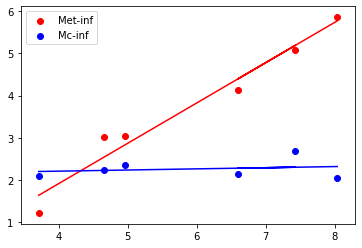

In [15]:
print(pearsonr(MetusalemSemantics, MetusalemInference))
print(pearsonr(MetusalemSemantics, McKoonInference))

plt.scatter(MetusalemSemantics, MetusalemInference, label='Met-inf', color='red')
plt.scatter(MetusalemSemantics, McKoonInference, label='Mc-inf', color='blue')

coefficientMetusalem = np.polyfit(MetusalemSemantics, MetusalemInference, 1)
coefficientMcKoon = np.polyfit(MetusalemSemantics, McKoonInference, 1)
print(coefficientMetusalem)
print(coefficientMcKoon)

plt.plot(MetusalemSemantics, np.poly1d(coefficientMetusalem)(MetusalemSemantics), color='red')
plt.plot(MetusalemSemantics, np.poly1d(coefficientMcKoon)(MetusalemSemantics), color='blue')

plt.legend()
plt.show()